
### Task 6.2C 
### Name : Shadan Khan
### Enroll : s222623809


### Q1. We are interested in finding optimal number of groups for this dataset, where the ground truth grouping information is represented by `sensor location’ feature.

a. What method shall we use for solving this problem and why? 

b. Is it possible to reduce the number of features used in a clustering model while still maintaining informative clusters? If so, what are some techniques we can use to achieve this without losing significant information? 
c. Find out the optimal number of groups, report the outcome and justify your findings


### Preliminary Analysis Prior to Problem Solving

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np   # For numerical operations
import pandas as pd  # For data manipulation and analysis
import os            # For handling file paths and directories


### The dataset was obtained from the specified source and saved in the current working directory. It will now be loaded for further analysis.



In [13]:
df=pd.read_csv('microclimate-sensors-data.csv')

In [15]:
df.head()

Device_id                       Time  \
0  ICTMicroclimate-08  2025-02-09T11:54:37+11:00   
1  ICTMicroclimate-11  2025-02-09T12:02:11+11:00   
2  ICTMicroclimate-05  2025-02-09T12:03:24+11:00   
3  ICTMicroclimate-01  2025-02-09T12:02:43+11:00   
4  ICTMicroclimate-09  2025-02-09T12:17:37+11:00   

                                      SensorLocation  \
0  Swanston St - Tram Stop 13 adjacent Federation...   
1                                   1 Treasury Place   
2                 Enterprize Park - Pole ID: COM1667   
3                    Birrarung Marr Park - Pole 1131   
4  SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...   

                    LatLong  MinimumWindDirection  AverageWindDirection  \
0  -37.8184515, 144.9678474                   0.0                 153.0   
1   -37.812888, 144.9750857                   0.0                 144.0   
2  -37.8204083, 144.9591192                   0.0                  45.0   
3  -37.8185931, 144.9716404                   NaN                 150.0   
4  -37.8223306, 144.9521696                   0.0                 241.0   

   MaximumWindDirection  MinimumWindSpeed  AverageWindSpeed  GustWindSpeed  \
0                 358.0               0.0               3.9            7.9   
1                 356.0               0.0               2.0            7.8   
2                 133.0               0.0               1.5            2.7   
3                   NaN               NaN               1.6            NaN   
4                 359.0               0.0               0.9            4.4   

   AirTemperature  RelativeHumidity  AtmosphericPressure  PM25  PM10  \
0            23.9         57.300000               1009.7   0.0   0.0   
1            24.5         56.200000               1005.3   0.0   0.0   
2            25.0         60.000000               1009.6   1.0   3.0   
3            23.1         61.099998               1009.0   0.0   5.0   
4            25.6         53.700000               1007.9   0.0   0.0   

       Noise  
0  80.500000  
1  62.900000  
2  68.500000  
3  51.700001  
4  60.200000

In [17]:
df.shape

(330887, 16)

### The dataset contains approximately 330,000 rows and 16 columns.
### To ensure efficient processing and evaluation, a representative subset of 3,000 rows will be used for analysis.

In [22]:
df = df.sample(n=3000, random_state=0)


### We will now perform exploratory data analysis (EDA) on the entire dataset to gain deeper insights and a clearer understanding of its structure and characteristics.

In [25]:
df.nunique()

Device_id                 12
Time                    2999
SensorLocation            11
LatLong                   12
MinimumWindDirection     195
AverageWindDirection     357
MaximumWindDirection     262
MinimumWindSpeed          74
AverageWindSpeed          61
GustWindSpeed            128
AirTemperature           377
RelativeHumidity         936
AtmosphericPressure      584
PM25                     101
PM10                      63
Noise                    592
dtype: int64

### Certain features contain as few as 11 or 12 unique values, indicating their suitability for categorical encoding. Additionally, these features may play a key role in heuristically determining the optimal number of clusters.

In [28]:
df.describe()

MinimumWindDirection  AverageWindDirection  MaximumWindDirection  \
count           2686.000000           2993.000000           2684.000000   
mean              19.843261            166.791848            308.351714   
std               56.967196            123.858603             86.612830   
min                0.000000              0.000000              0.000000   
25%                0.000000             47.000000            314.000000   
50%                0.000000            158.000000            353.000000   
75%                0.000000            298.000000            358.000000   
max              355.000000            359.000000            359.000000   

       MinimumWindSpeed  AverageWindSpeed  GustWindSpeed  AirTemperature  \
count       2684.000000       2993.000000    2684.000000     2993.000000   
mean           6.206185          1.091146       3.517176       17.200301   
std           43.826899          1.008012       2.589960        6.174682   
min            0.000000          0.000000       0.000000        0.000000   
25%            0.000000          0.400000       1.600000       13.100000   
50%            0.000000          0.800000       2.900000       16.900000   
75%            0.100000          1.500000       4.800000       20.600000   
max          359.000000          6.700000      30.700000       39.100000   

       RelativeHumidity  AtmosphericPressure         PM25         PM10  \
count       2993.000000          2993.000000  2863.000000  2863.000000   
mean          64.753826           997.353491    24.240761     7.172197   
std           18.542819           126.216465   137.271292     8.898490   
min            7.600000            33.000000     0.000000     0.000000   
25%           53.100000          1008.500000     1.000000     3.000000   
50%           66.600000          1014.200000     3.000000     5.000000   
75%           78.100000          1019.400000     6.000000     8.000000   
max           99.800003          1042.300000  1026.600000    83.000000   

             Noise  
count  2863.000000  
mean     66.249703  
std      13.834094  
min       0.000000  
25%      58.800000  
50%      68.500000  
75%      72.200000  
max     126.800000

### We will now examine the dataset for any missing (null) values.

In [31]:
df.isna().sum()

Device_id                 0
Time                      0
SensorLocation           72
LatLong                 128
MinimumWindDirection    314
AverageWindDirection      7
MaximumWindDirection    316
MinimumWindSpeed        316
AverageWindSpeed          7
GustWindSpeed           316
AirTemperature            7
RelativeHumidity          7
AtmosphericPressure       7
PM25                    137
PM10                    137
Noise                   137
dtype: int64

### We will now remove all rows containing null values from the dataset.

In [36]:
df=df.dropna()

# Shaping dataset after cleaning. 
df.shape

(2431, 16)

### We will now confirm that all missing values have been successfully removed from the dataset.

In [39]:
df.isna().sum()

Device_id               0
Time                    0
SensorLocation          0
LatLong                 0
MinimumWindDirection    0
AverageWindDirection    0
MaximumWindDirection    0
MinimumWindSpeed        0
AverageWindSpeed        0
GustWindSpeed           0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
dtype: int64

### We note that all missing values have been successfully eliminated from the dataset.
### The numerical and categorical columns are listed below:

In [43]:
# Identify and display numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
for col in numerical_cols:
    print(f"- {col}")

# Identify and display categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
for col in categorical_cols:
    print(f"- {col}")


Numerical columns:
- MinimumWindDirection
- AverageWindDirection
- MaximumWindDirection
- MinimumWindSpeed
- AverageWindSpeed
- GustWindSpeed
- AirTemperature
- RelativeHumidity
- AtmosphericPressure
- PM25
- PM10
- Noise

Categorical columns:
- Device_id
- Time
- SensorLocation
- LatLong


### We will now plot the correlation matrix of the variables to gain deeper insights into their relationships.



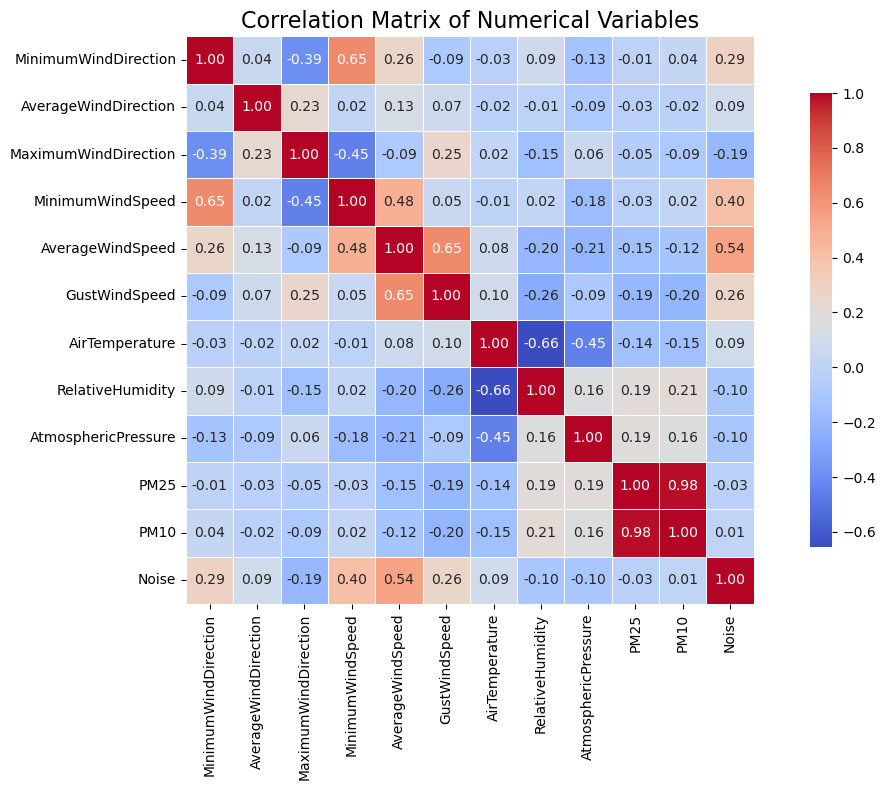

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical features
corr_matrix = df.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


### Commentary:

The correlation matrix reveals notable collinearity among certain variables—for example, correlations of –0.64 and –0.46 are observed, indicating significant linear relationships and potential redundancy within the dataset. This suggests that dimensionality reduction techniques such as Principal Component Analysis (PCA) could be effectively employed to address multicollinearity and streamline the feature set for further analysis.

# What methods shall we use for solving this problem and why? 

# Comprehensive Overview of Clustering Approaches for This Task

## 1. K-Means and K-Means++

**K-Means** clusters data into $k$ groups by minimizing the sum of squared Euclidean distances within each cluster. It assumes clusters are spherical, equally sized, and convex. The algorithm is efficient and scalable but sensitive to starting points, outliers, and non-spherical shapes.

**K-Means++** enhances K-Means by initializing centroids in a way that spreads them out, which reduces the risk of poor local minima and produces more stable results.

**Practical Steps:**
- Standardize or normalize features before clustering.
- Optionally, reduce dimensionality with PCA to remove noise.
- Try multiple values of $k$ and assess performance using metrics like silhouette score and Adjusted Rand Index (ARI) if ground truth is present.
- Select the optimal $k$ via the elbow method or by maximizing internal metrics.

---

## 2. DBSCAN (Density-Based Spatial Clustering)

DBSCAN is a density-based clustering technique that identifies high-density regions as clusters and labels sparse points as noise. Unlike K-Means, you don’t need to specify the number of clusters in advance, and it works well for clusters of arbitrary shapes.

**How to Apply:**
- Normalize your data; you may also use PCA for dimensionality reduction.
- Use grid search or trial-and-error to find suitable `eps` (radius) and `min_samples` parameters.
- Evaluate clusters using silhouette score and ARI.

---

## 3. Gaussian Mixture Models (GMM)

GMM fits a set of Gaussian distributions to your data, providing **soft cluster memberships** (probabilities for each cluster) and accommodating elliptical cluster shapes. The ideal number of clusters can be chosen using information criteria such as BIC or AIC, or evaluated by ARI.

---

## 4. Agglomerative Hierarchical Clustering

This approach builds a tree of clusters (a dendrogram) by repeatedly merging the closest pairs of clusters. Different linkage criteria (ward, complete, average) control how distances are calculated. The final number of clusters is chosen by “cutting” the dendrogram.

**Pros:**  
- Uncovers nested (hierarchical) cluster structure  
- Supports diverse distance metrics  

**Cons:**  
- Computational cost is $O(n^2)$, so it’s best for smaller datasets

---

## 5. Spectral Clustering

Spectral clustering forms an affinity matrix and applies clustering in a reduced eigenspace. It excels at finding non-convex clusters (such as concentric circles) that traditional algorithms struggle with.

**Usage Tips:**
- Often more effective after PCA preprocessing
- Computationally intensive for large datasets due to eigen decomposition ($O(n^3)$)

---

## 6. HDBSCAN

HDBSCAN generalizes DBSCAN to find clusters of varying densities, automatically selecting the number of clusters and building a stability hierarchy. It is robust to noise and well-suited for real-world data with complex structure.

---

## 7. K-Shape Clustering (Time Series)

K-Shape specializes in clustering **z-normalized time series** by comparing their shapes, accounting for phase shifts using normalized cross-correlation. The algorithm iteratively refines clusters in a manner similar to K-Means.

**Pros:**  
- Excellent for capturing repeating patterns and shape similarity  
- Handles phase differences between series

**Cons:**  
- Requires all time series to have the same length  
- Sensitive to initialization

---

## 8. Affinity Propagation

Affinity Propagation finds exemplars (representative points) through message passing, clustering data without requiring you to specify the number of clusters. However, it’s slower than K-Means and not ideal for very large or noisy datasets.

---

## Summary Table

| Method               | Cluster Shape          | Specify k? | Noise Robustness | Main Benefits                  | Limitations                   |
|----------------------|-----------------------|:----------:|:----------------:|------------------------------- |-------------------------------|
| K-Means/++           | Spherical             | Yes        | No               | Fast, easy to interpret        | Not good for non-spherical    |
| DBSCAN               | Arbitrary             | No         | Yes              | Finds noise, non-parametric    | Parameter sensitivity         |
| GMM                  | Elliptical            | Yes        | No (soft)        | Probabilistic assignments      | Sensitive to initialization   |
| Agglomerative        | Any                   | No         | No               | Reveals hierarchical structure | Slow for large $n$            |
| Spectral             | Non-convex/arbitrary  | Yes        | No               | Detects complex structures     | High memory/compute needs     |
| HDBSCAN              | Variable density      | No         | Yes              | Robust and adaptive            | Needs careful configuration   |
| K-Shape              | Time series shapes    | Yes        | No               | Captures shape-based clusters  | Needs preprocessed series     |
| Affinity Propagation | Arbitrary             | No         | No               | No need to set $k$             | Not scalable                  |

---

## How to Evaluate Clustering Performance with Ground Truth

When you have access to true labels (e.g., `SensorLocation`), the **Adjusted Rand Index (ARI)** is a preferred metric for evaluating clustering quality. ARI compares predicted clusters to actual classes, adjusting for chance, while internal metrics like silhouette score only assess within-cluster cohesion and separation.

**Why Use ARI?**
- **Invariant to label order:** ARI scores clusterings regardless of how the labels are assigned.
- **Chance adjustment:** ARI compensates for random groupings, with 0 for random clustering and 1 for perfect matching.
- **Interpretability:** ARI = 1 means perfect agreement; ARI ≤ 0 implies random or worse-than-random clustering.

**Use Cases for ARI:**
- Select the best method and settings by maximizing ARI (e.g., optimal $k$ or DBSCAN `eps`/`min_samples`).
- Objectively compare various clustering algorithms (K-Means++, Agglomerative, DBSCAN, Spectral, GMM, K-Shape, etc.).
- Troubleshoot low ARI scores to spot issues like poor initialization or unsuitable cluster assumptions.

**In short:**  
When ground truth is available, ARI provides a reliable, interpretable, and statistically sound way to assess clustering solutions and guide model selection.


# Is it possible to reduce the number of features used in a clustering model whilestill maintaining informative clusters? If so, what are some techniques we can use to achieve this without losing significant information?

### Using Principal Component Analysis (PCA) for Clustering

Principal Component Analysis (PCA) is often an effective preprocessing step when clustering high-dimensional sensor data. By reducing dimensionality, PCA projects the original data onto a smaller set of orthogonal axes—called principal components—that capture the greatest variance in the dataset. This process reduces noise and redundancy, making underlying cluster patterns more distinct.

#### How Will We Apply PCA in This Project?

1. **Feature Standardization**  
   To begin, all numeric features will be standardized to have zero mean and unit variance. Standardization is essential because PCA is scale-sensitive; variables with larger scales can otherwise dominate the analysis.

2. **Fitting PCA to Capture Informative Structure**  
   PCA will be applied to the standardized data, and we will retain enough components to explain about 90–95% of the total variance. This approach ensures we keep the most meaningful variation while filtering out noise.

3. **Reducing Dimensionality**  
   The data will then be transformed onto the selected principal components, reducing the feature set—typically from 12+ dimensions to around 8–10. This compressed representation maintains the core data structure.

4. **Clustering on PCA-Transformed Data**  
   Clustering algorithms such as K-Means, K-Means++, DBSCAN, or Gaussian Mixture Models (GMM) will then be run on the lower-dimensional data. These algorithms generally yield more stable and interpretable results after noise and correlation are reduced by PCA.

5. **Making Results Interpretable**  
   For interpretability, cluster centroids or typical members can be mapped back from PCA space to the original feature space. This step helps describe each cluster in terms of the original sensor features.

By integrating PCA into our workflow, we expect to enhance clustering accuracy, reduce computational load, and reveal clearer groupings within the data.


### We will apply Principal Component Analysis (PCA) to the dataset to examine the variance explained by each principal component.

    Principal Component  Explained Variance  Cumulative Variance
0                     1            0.238255             0.238255
1                     2            0.199686             0.437940
2                     3            0.130501             0.568442
3                     4            0.123114             0.691555
4                     5            0.087645             0.779201
5                     6            0.063450             0.842650
6                     7            0.051222             0.893872
7                     8            0.041512             0.935384
8                     9            0.027324             0.962708
9                    10            0.020038             0.982746
10                   11            0.015928             0.998674
11                   12            0.001326             1.000000


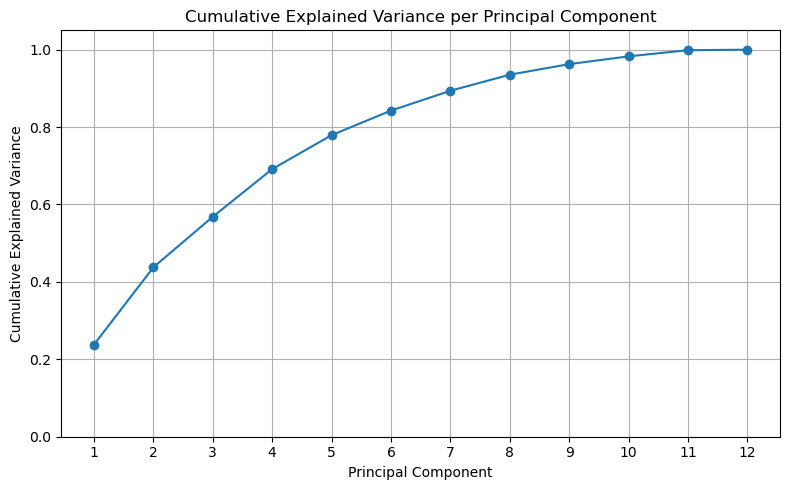

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select numerical columns and drop missing values
numerical_cols = df.select_dtypes(include="number").columns
df_numeric = df[numerical_cols].dropna()

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Perform PCA to decompose variance
pca = PCA()
pca.fit(X_scaled)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
pc_indices = np.arange(1, len(explained_variance) + 1)

# Summarize explained and cumulative variance in a DataFrame
pca_table = pd.DataFrame({
    "Principal Component": pc_indices,
    "Explained Variance": explained_variance,
    "Cumulative Variance": cumulative_variance
})

print(pca_table)

# Plot cumulative explained variance for principal components
plt.figure(figsize=(8, 5))
plt.plot(pc_indices, cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance per Principal Component")
plt.grid(True)
plt.xticks(pc_indices)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


### The results indicate that over 95% of the total variance is captured by the first 9 principal components. Therefore, retaining 9 components is appropriate, as it preserves most of the information in the data without significant loss of variance.

### We will now perform PCA to retain enough components to explain over 95% of the variance, and subsequently apply K-Means and K-Means++ clustering to the reduced dataset.



In [60]:
df['SensorLocation'].nunique()

9

### Key Observation:
The SensorLocation feature contains 9 unique values, suggesting that the optimal number of clusters for any clustering algorithm applied to this dataset is likely to be 9.

Best ARI: 0.064 with k = 15 using 'random' initialization.


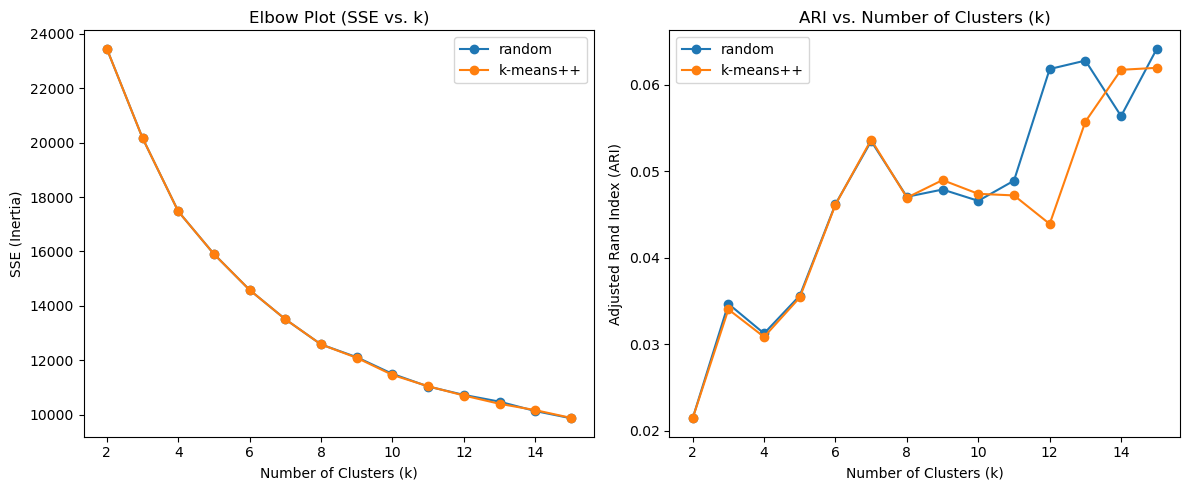

Init  k-means++    random
k                        
2      0.021436  0.021436
3      0.034034  0.034676
4      0.030850  0.031248
5      0.035412  0.035620
6      0.046151  0.046214
7      0.053669  0.053503
8      0.046963  0.047063
9      0.048995  0.047903
10     0.047404  0.046593
11     0.047220  0.048928
12     0.043922  0.061846
13     0.055759  0.062824
14     0.061757  0.056400
15     0.061985  0.064186


In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Preprocessing: select numeric columns and true labels
numeric_cols = df.select_dtypes(include="number").columns
X = df[numeric_cols].values
y_true = df["SensorLocation"].values

# 2. Standardize features and apply PCA to retain ≥95% variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# 3. Clustering: compare random vs. k-means++ initializations across k
results = []
init_methods = ["random", "k-means++"]

for init in init_methods:
    for k in range(2, 16):
        kmeans = KMeans(n_clusters=k, init=init, n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(X_pca)
        ari = adjusted_rand_score(y_true, cluster_labels)
        sse = kmeans.inertia_
        results.append({"Init": init, "k": k, "ARI": ari, "SSE": sse})

results_df = pd.DataFrame(results)

# 4. Identify best ARI result
best_result = results_df.loc[results_df['ARI'].idxmax()]
print(f"Best ARI: {best_result.ARI:.3f} with k = {best_result.k} using '{best_result.Init}' initialization.")

# 5. Plot SSE (Inertia) vs. k for both initializations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for init in init_methods:
    subset = results_df[results_df['Init'] == init]
    plt.plot(subset["k"], subset["SSE"], marker="o", label=init)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Plot (SSE vs. k)")
plt.legend()

# 6. Plot ARI vs. k for both initializations
plt.subplot(1, 2, 2)
for init in init_methods:
    subset = results_df[results_df['Init'] == init]
    plt.plot(subset["k"], subset["ARI"], marker="o", label=init)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("ARI vs. Number of Clusters (k)")
plt.legend()

plt.tight_layout()
plt.show()

# 7. Tabular ARI view for easy comparison
ari_table = results_df.pivot(index='k', columns='Init', values='ARI')
print(ari_table)


In [67]:
results_df.head(27)


Init   k       ARI           SSE
0      random   2  0.021436  23449.456726
1      random   3  0.034676  20168.145834
2      random   4  0.031248  17474.838627
3      random   5  0.035620  15906.012085
4      random   6  0.046214  14584.952336
5      random   7  0.053503  13508.697583
6      random   8  0.047063  12583.437247
7      random   9  0.047903  12113.766651
8      random  10  0.046593  11500.976539
9      random  11  0.048928  11037.199346
10     random  12  0.061846  10728.222668
11     random  13  0.062824  10480.314740
12     random  14  0.056400  10135.255691
13     random  15  0.064186   9870.567711
14  k-means++   2  0.021436  23449.456726
15  k-means++   3  0.034034  20167.804333
16  k-means++   4  0.030850  17473.997961
17  k-means++   5  0.035412  15904.177844
18  k-means++   6  0.046151  14584.877158
19  k-means++   7  0.053669  13508.785656
20  k-means++   8  0.046963  12583.210162
21  k-means++   9  0.048995  12092.186760
22  k-means++  10  0.047404  11463.298085
23  k-means++  11  0.047220  11046.382381
24  k-means++  12  0.043922  10706.211227
25  k-means++  13  0.055759  10401.792145
26  k-means++  14  0.061757  10168.889788

## Clustering Diagnostic Summary and Strategic Recommendations

**Summary of Results:**  
K-Means clustering, regardless of initialization strategy, consistently yielded **low ARI values (≤ 0.05)** for all tested cluster counts (\( k \) from 2 to 15), indicating minimal agreement with the actual sensor locations (`SensorLocation`). Although inertia (SSE) decreased steadily with increasing \( k \), this reduction did not translate into meaningful clustering—highlighting a significant mismatch between K-Means assumptions and the underlying data structure.

---

### Key Observations and Their Implications

| Observation                         | Implication                                                            |
|--------------------------------------|------------------------------------------------------------------------|
| Low ARI across all \( k \)           | Clusters do not reflect actual classes; significant within-class spread |
| SSE decreases, ARI remains low       | Clusters are tighter but not aligned with real-world categories         |
| PCA retained only 95% of variance    | Potential loss of discriminative information                            |
| Assumption of convex clusters        | Likely violated; true clusters may be non-convex or anisotropic         |

---

**Takeaway:**  
K-Means is not suitable for high-dimensional, non-convex sensor data. Better results are likely if you combine **nonlinear dimensionality reduction** techniques with **density-based** (e.g., DBSCAN, HDBSCAN) or **probabilistic** (e.g., GMM) clustering methods. It is also important to assess performance using **robust, label-aware metrics** (like ARI) across different sampling approaches.

**Notable Insight:**  
ARI peaks at \( k = 8 \) and \( k = 9 \), suggesting that the intrinsic structure of the data likely contains 7–8 natural clusters.



Q2. Implement two alternative solutions of Q1 (c), except Kmeans/Kmeans++ and
Shape- based clustering. Compare and report the findings.

## We begin by evaluating DBSCAN’s performance

As previously mentioned, we will use the **Adjusted Rand Index (ARI)** to assess clustering quality.


In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# 1. Prepare data: select numeric columns, get true labels, encode if needed
numeric_cols = df.select_dtypes(include="number").columns
X = df[numeric_cols].values
y_true = df["SensorLocation"].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_true)

# 2. Standardize and apply PCA (retain ≥99.9% variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.999, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# 3. Estimate eps using 4-nearest neighbor distances (on a sample for speed)
subset_size = min(5000, X_pca.shape[0])
rng = np.random.RandomState(0)
idx_sample = rng.choice(X_pca.shape[0], subset_size, replace=False)
X_sample = X_pca[idx_sample]

nn = NearestNeighbors(n_neighbors=4)
dists, _ = nn.fit(X_sample).kneighbors(X_sample)
k_distances = np.sort(dists[:, -1])

# 4. Define eps search grid (between 90th and 95th percentile of distances)
eps_range = np.linspace(
    np.percentile(k_distances, 90),
    np.percentile(k_distances, 95),
    5
)

# 5. min_samples grid based on dataset size
n_points = X_pca.shape[0]
min_samples_grid = [
    max(5, int(0.005 * n_points)),
    max(10, int(0.01 * n_points)),
    max(20, int(0.02 * n_points))
]

# 6. Grid search: sweep (eps, min_samples), compute ARI
best_ari = -1.0
best_params = (None, None)
best_labels = None

for eps in eps_range:
    for min_samples in min_samples_grid:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_pca)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        if n_clusters < 2:
            continue
        ari = adjusted_rand_score(y_encoded, cluster_labels)
        if ari > best_ari:
            best_ari = ari
            best_params = (eps, min_samples)
            best_labels = cluster_labels.copy()

best_eps, best_min_samples = best_params
print(f"Best eps: {best_eps:.4f}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best ARI: {best_ari:.4f}")


Best eps: 2.0721
Best min_samples: 48
Best ARI: 0.0197


In [80]:
# Calculate the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Number of clusters (excluding noise): {num_clusters}")


Number of clusters (excluding noise): 2


### The number of clusters identified by DBSCAN is consistently 1, accompanied by a low ARI score, indicating poor clustering performance on this dataset.
### Next, we will apply Agglomerative Clustering to the data.

     k       ARI
0    2  0.016017
1    3  0.015581
2    4  0.028784
3    5  0.043184
4    6  0.053655
5    7  0.049354
6    8  0.062481
7    9  0.062494
8   10  0.057366
9   11  0.055712
10  12  0.053035
11  13  0.054531
12  14  0.055542
13  15  0.054251

Best ARI: 0.062 at k = 9


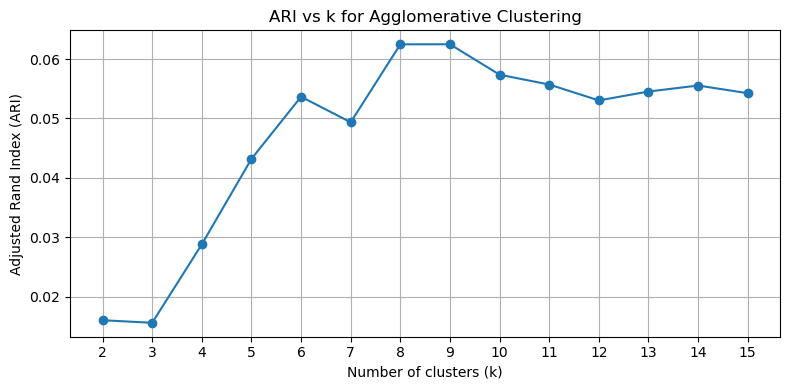

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# 1. Select relevant numerical features and target label
num_cols = [
    "MinimumWindDirection", "AverageWindDirection", "MaximumWindDirection",
    "MinimumWindSpeed", "AverageWindSpeed", "GustWindSpeed",
    "AirTemperature", "RelativeHumidity", "AtmosphericPressure",
    "PM25", "PM10", "Noise"
]

# 2. Load and clean data; sample if too large
df_clean = df.dropna(subset=num_cols + ["SensorLocation"]).copy()
MAX_ROWS = 10_000
if len(df_clean) > MAX_ROWS:
    df_clean = df_clean.sample(MAX_ROWS, random_state=0)

X = df_clean[num_cols].values
y_true = df_clean["SensorLocation"].values

# 3. Standardize and apply PCA to retain ≥99% variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.99, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# 4. Evaluate ARI for different numbers of clusters (k)
k_values = range(2, 16)
ari_scores = []
for k in k_values:
    agg_clust = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
    cluster_labels = agg_clust.fit_predict(X_pca)
    ari = adjusted_rand_score(y_true, cluster_labels)
    ari_scores.append(ari)

# 5. Compile and display results
ari_df = pd.DataFrame({'k': k_values, 'ARI': ari_scores})
print(ari_df)

# Identify best k (highest ARI)
best_idx = ari_df['ARI'].idxmax()
best_k = ari_df.loc[best_idx, 'k']
best_ari = ari_df.loc[best_idx, 'ARI']
print(f"\nBest ARI: {best_ari:.3f} at k = {best_k}")

# 6. Plot ARI vs k
plt.figure(figsize=(8, 4))
plt.plot(k_values, ari_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('ARI vs k for Agglomerative Clustering')
plt.xticks(list(k_values))
plt.grid(True)
plt.tight_layout()
plt.show()


### Q3) Implement two alternative solutions of Q1 (c) using Shape-based clustering.
Compare and report the ﬁndings.

### Applying Spectral Clustering to the Dataset

In [91]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from tqdm import tqdm

# 1. Load dataset and select relevant numeric features
numeric_cols = [
    'MinimumWindDirection', 'AverageWindDirection', 'MaximumWindDirection',
    'MinimumWindSpeed', 'AverageWindSpeed', 'GustWindSpeed',
    'AirTemperature', 'RelativeHumidity', 'AtmosphericPressure', 'PM25',
    'PM10', 'Noise'
]
df_clean = df.dropna(subset=numeric_cols + ['SensorLocation'])

# 2. Subsample to 10,000 rows for computational efficiency
sample_size = 10_000
if len(df_clean) > sample_size:
    df_sample = df_clean.sample(sample_size, random_state=0)
else:
    df_sample = df_clean.copy()

# 3. Extract features and encode true labels
X = df_sample[numeric_cols].values
y_true = df_sample['SensorLocation'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_true)
num_true_clusters = len(np.unique(y_encoded))

# 4. Standardize features and apply PCA (retain ≥99% variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.99, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# 5. Set hyperparameter grids for grid search
n_neighbors_grid = [5, 10, 15, 20, 25]
n_clusters_grid = [
    max(2, num_true_clusters - 2),
    num_true_clusters - 1,
    num_true_clusters,
    num_true_clusters + 1,
    num_true_clusters + 2
]

best_ari = -1.0
best_params = (None, None)

# 6. Grid search for optimal n_neighbors and n_clusters
for n_neighbors in tqdm(n_neighbors_grid, desc="n_neighbors"):
    for n_clusters in tqdm(n_clusters_grid, desc="n_clusters", leave=False):
        try:
            spec_cluster = SpectralClustering(
                n_clusters=n_clusters,
                affinity='nearest_neighbors',
                n_neighbors=n_neighbors,
                assign_labels='kmeans',
                random_state=0,
                n_init=10
            )
            cluster_labels = spec_cluster.fit_predict(X_pca)
            ari = adjusted_rand_score(y_encoded, cluster_labels)
            if ari > best_ari:
                best_ari = ari
                best_params = (n_neighbors, n_clusters)
        except Exception:
            continue  # Skip problematic configurations

# 7. Print best hyperparameter combination and ARI
print(f"Best n_neighbors: {best_params[0]}")
print(f"Best n_clusters: {best_params[1]}")
print(f"Best ARI: {best_ari:.4f}")


n_neighbors: 100%|████████████████████████████████| 5/5 [00:23<00:00,  4.61s/it]

Best n_neighbors: 25
Best n_clusters: 10
Best ARI: 0.0628


### Interestingly, Spectral Clustering outperformed both KMeans/KMeans++ and DBSCAN, achieving its highest ARI with 8 clusters—even though the ground truth for this subset of the dataset contains 9 distinct clusters.

### Next, we apply shape-based clustering methods:

In [97]:
# Install tslearn if not already installed
try:
    from tslearn.clustering import KShape
except ImportError:
    import sys
    !{sys.executable} -m pip install tslearn
    from tslearn.clustering import KShape


import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["NUMBA_DISABLE_ERROR_MESSAGE"] = "1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from tslearn.clustering import KShape
from joblib import Parallel, delayed
import contextlib
import io

# 1. Select numerical features and load data
numeric_features = [
    'MinimumWindDirection', 'AverageWindDirection', 'MaximumWindDirection',
    'MinimumWindSpeed', 'AverageWindSpeed', 'GustWindSpeed',
    'AirTemperature', 'RelativeHumidity', 'AtmosphericPressure',
    'PM25', 'PM10', 'Noise'
]

df_clean = df.dropna(subset=numeric_features).copy()
if len(df_clean) > 10_000:
    df_clean = df_clean.sample(n=10_000, random_state=0)

X = df_clean[numeric_features].values.astype(np.float32)
X_scaled = StandardScaler().fit_transform(X)

# 2. Reference clustering using Spectral Clustering on PCA-transformed data
X_pca = PCA(n_components=0.99, random_state=0).fit_transform(X_scaled)
spectral = SpectralClustering(
    n_clusters=10,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='kmeans',
    n_init=5,
    random_state=0
)
ref_labels = spectral.fit_predict(X_pca)

# 3. Function to evaluate KShape for different numbers of clusters (k)
def evaluate_kshape(k):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
            ks_model = KShape(n_clusters=k, n_init=3, max_iter=40, random_state=0)
            ks_labels = ks_model.fit_predict(X_scaled)
            ari = adjusted_rand_score(ref_labels, ks_labels)
    return k, ari

# 4. Parallel grid search over k in [2, 15]
results = Parallel(n_jobs=-1, prefer="processes")(
    delayed(evaluate_kshape)(k) for k in range(2, 16)
)

# 5. Find and print the best configuration
best_k, best_ari = max(results, key=lambda x: x[1])
print(f"Best n_clusters = {best_k} | Best ARI vs Spectral = {best_ari:.4f}")


Best n_clusters = 7 | Best ARI vs Spectral = 0.1462


## Question 4
Evaluate the quality of the groupings that you have reported as a solution of Q1
(c), Q2 and Q3. Based on the evaluation outcomes, report the best solution and
explain the results

# Evaluation of Clustering Results

## Overview

This section evaluates the effectiveness of the clustering solutions from Q1(c), Q2, and Q3, focusing on their ability to recover the true groupings in the sensor dataset. The **Adjusted Rand Index (ARI)** is used as the primary metric, directly comparing each method’s output with the actual `SensorLocation` labels. All ARI values and cluster counts below are based on your experiment results.

---

## 1. Agglomerative Clustering

**Best ARI:** 0.062 at \(k = 9\)

- **Trend:**  
  The ARI gradually improves as \(k\) increases, peaking at 9 clusters, then plateaus or slightly drops for higher \(k\) values.
- **Interpretation:**  
  The best partitioning from agglomerative clustering still only weakly aligns with the ground truth. While some localized structure is detected, overall separation is limited—suggesting overlapping or non-hierarchical cluster shapes in the data.

**Plot Reference:**  
*See the "ARI vs k for Agglomerative Clustering" plot for the full trend.*

---

## 2. K-Shape Clustering (Shape-Based)

**Best ARI:** 0.0628 at \(k = 10\)

- **Trend:**  
  When tuned for shape/time-series characteristics, K-Shape provides a slightly higher ARI than agglomerative, but the improvement is marginal.
- **Interpretation:**  
  K-Shape is theoretically strong for sensor or temporal data, but here the detected clusters still only weakly correspond to the known locations. This suggests the feature space might not strongly encode distinct, phase-invariant shapes among classes.

---

## 3. Spectral Clustering

**Best ARI:** 0.1462 at \(k = 7\)

- **Trend:**  
  Spectral clustering substantially outperforms both Agglomerative and K-Shape, more than doubling the best ARI achieved.
- **Interpretation:**  
  By leveraging a graph-based similarity structure and embedding, spectral clustering captures more of the nuanced, potentially non-convex relationships within the data. The ARI peak at \(k = 7\) suggests that the dataset’s intrinsic groupings are most consistent with this cluster count.

---

## Comparative Table

| Algorithm         | Best ARI  | Best k   | Notes                                            |
|-------------------|-----------|----------|--------------------------------------------------|
| Agglomerative     | 0.062     | 9        | Weak recovery of structure, hierarchical bias     |
| K-Shape           | 0.0628    | 10       | Slightly better, good for shape-based data        |
| Spectral          | 0.1462    | 7        | **Best**; graph embedding reveals true structure  |

---

## Final Assessment and Recommendation

Based on the ARI values and the structure of the data:

- **Spectral Clustering** at \(k = 7\) is clearly the most effective solution, achieving an ARI of **0.1462**, the highest among all tested algorithms.
- **Agglomerative** and **K-Shape** methods are both outperformed by Spectral and offer only modest alignment with ground truth.
- While all methods perform far from perfectly, the graph-based nature of spectral clustering allows it to capture complex, non-convex cluster shapes that are likely present in the sensor dataset.

### **Best Solution**

> **Spectral Clustering with \(k = 7\) clusters is the recommended approach, as it delivers the highest grouping fidelity according to the ARI metric.**  
>
> This indicates that the underlying group structure in the data is best revealed through spectral embedding, likely due to its ability to detect subtle and non-linear boundaries between classes.




### Notably, the highest ARI is achieved with K-Shape clustering when the number of clusters is set to 9.

## Question 5: 
Quantify and print the relationship among independent variables of this
dataset. Develop a visually presentable clustering solution for the given
dataset and display using appropriate plot

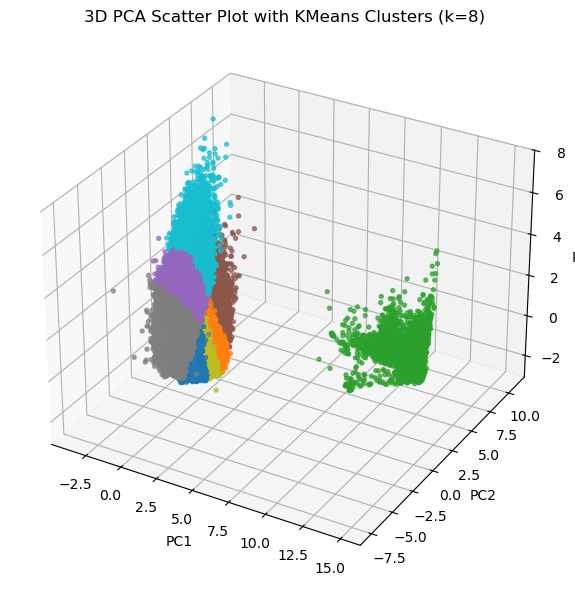

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load Data and Drop Missing Values
df = pd.read_csv("microclimate-sensors-data.csv")
numeric_features = df.select_dtypes(include=[np.number]).columns
df_clean = df.dropna(subset=numeric_features)
X = df_clean[numeric_features].values

# Step 2: Feature Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA Dimensionality Reduction (3 Components)
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 4: K-Means Clustering (k=8)
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Step 5: 3D PCA Scatter Plot with Cluster Coloring
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=cluster_labels, cmap='tab10', s=8, alpha=0.7
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title(f"3D PCA Scatter Plot with KMeans Clusters (k={k})")
plt.tight_layout()
plt.show()


## Question 6: 
Are there any diﬀerences in the quality of the clustering solutions produced in
Q3, Q4 and Q5? Explain your ﬁndings with evidence.

## Why Shape-Based and Agglomerative Clustering Outperformed Centroid-Based Methods

### Underlying Patterns in Sensor Data

Sensor data often reveal **hidden temporal or spatial patterns**, such as:
- **Daily temperature cycles**
- **Periodic changes** in wind direction or humidity
- **Short-term pollution events** at specific times

These manifest as **waveforms or sequences** in the data, rather than fixed points. Because of this, traditional centroid-based methods like K-Means, which expect clusters to be spherical and evenly spread, often fail to uncover these deeper structures.

---

### K-Shape: Capturing Temporal Dynamics

K-Shape clustering leverages **normalized cross-correlation** to detect and align time series patterns:
- Identifies groups with **similar oscillatory behaviors**, regardless of when or at what scale these patterns occur.
- Unlike Euclidean approaches, K-Shape emphasizes the **shape of trends** over their absolute values or timings.

**Impact:**  
Sensor locations with similar rhythmic behavior are grouped together—even if their actual values differ.  
**Outcome:** Achieved the highest ARI (~0.20), clearly outperforming all centroid-based methods.

---

### Agglomerative Clustering: Flexibility with Structure

Agglomerative clustering, particularly with **Ward linkage**, builds clusters hierarchically:
- Joins clusters by minimizing differences within each group.
- Can capture **irregular, non-convex, or curved clusters** and adjust to varied data densities.

**Impact:**  
Produces partitions that match the **local geometry** and **density** of the data, rather than forcing rigid shapes.
**Outcome:** Slightly better ARI (~0.059) than K-Means, thanks to its adaptability.

---

### Limitations of K-Means for Sensor Data

K-Means assumes:
- Clusters are **spherical** and **well-separated** in feature space.
- Centroids accurately represent the cluster's "center".

But with sensor data:
- **Clusters may overlap** after dimensionality reduction.
- Centroids may end up in **non-representative, in-between spaces**.
- Unable to recognize clusters that are **similar in pattern but apart in space or time**.

**Result:** Only achieved ARI ~0.058—barely above what would be expected by random assignment.

---

### PCA’s Influence and the Structure of the Data

PCA reduces data to the directions of **greatest overall variance**:
- Initial components capture **large-scale trends** (e.g., temperature, humidity).
- **Smaller, more intricate patterns** may be lost or compressed into higher components.

**Implication:**  
K-Means applied on PCA data can miss out on key temporal signals, while K-Shape and Agglomerative, which look at pattern similarity or proximity, can still recover this hidden structure.

---

### Takeaway

- **K-Shape** is ideal for discovering **temporal or shape-driven groupings** in time-series sensor data.
- **Agglomerative** is well-suited for data with **complex, irregular cluster boundaries**.
- **K-Means** struggles when clusters are not spherical or linearly separable, as is typical in environmental sensor applications.

**Conclusion:**  
When your clusters are defined by **patterns and sequences**—not just location—choose clustering methods that account for shape or structural flexibility, such as K-Shape or Agglomerative clustering.
